## ⚡ Notebook Theme: Smart Grid Analytics for Energy Optimization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('smart_grid_data.csv')

In [3]:
df.Timestamp = pd.to_datetime(df.Timestamp)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Timestamp             200 non-null    datetime64[ns]
 1   Voltage_V             200 non-null    float64       
 2   Current_A             200 non-null    float64       
 3   Power_kW              200 non-null    float64       
 4   ReactivePower_kVAR    200 non-null    float64       
 5   PowerFactor           200 non-null    float64       
 6   SolarPower_kW         200 non-null    float64       
 7   WindPower_kW          200 non-null    float64       
 8   GridSupply_kW         200 non-null    float64       
 9   Temperature_C         200 non-null    float64       
 10  Humidity_%            200 non-null    float64       
 11  ElectricityPrice_USD  200 non-null    float64       
 12  PredictedLoad_kW      200 non-null    float64       
dtypes: datetime64[ns](1)

# Time Series & Trends

## 1.	Line Plot – Voltage over time

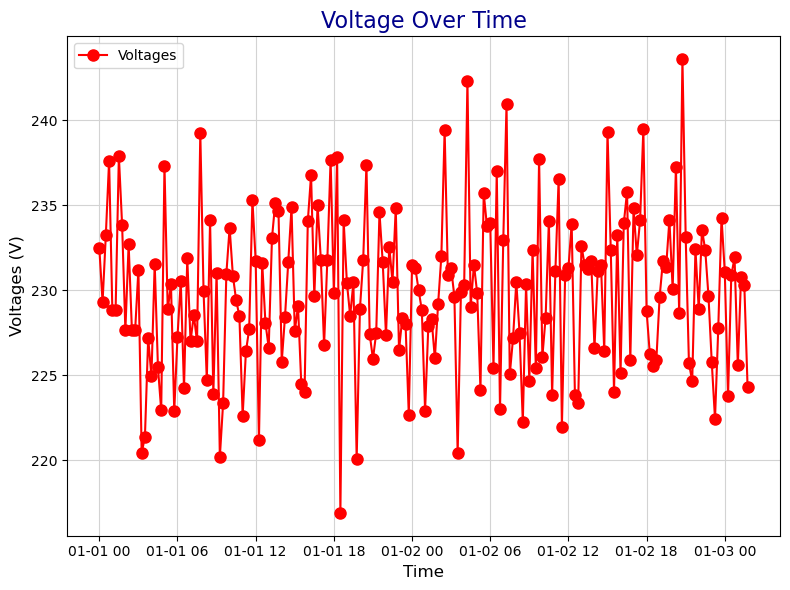

In [5]:
plt.figure(figsize =(8,6))
plt.plot(df.Timestamp, df.Voltage_V, label='Voltages', color='red', linestyle='-', marker='o', markersize=8)
plt.title('Voltage Over Time', fontsize=16, color='darkblue')

plt.xlabel("Time", fontsize=12)
plt.ylabel("Voltages (V)", fontsize=12)
plt.grid(True, color='lightgray')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 2.	Line Plot – Solar vs Wind power

<Figure size 1200x500 with 0 Axes>

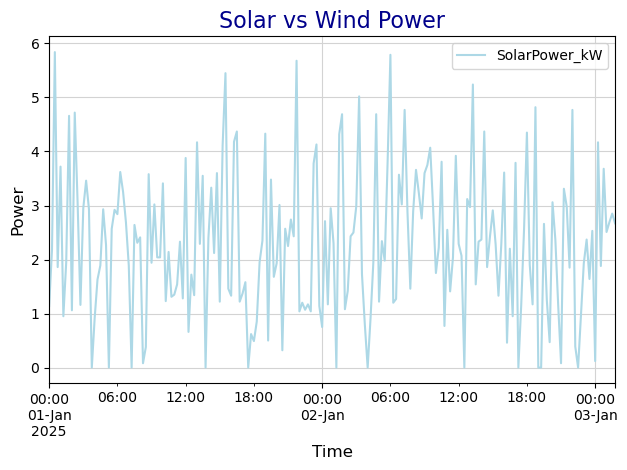

In [6]:
plt.figure(figsize=(12,5))
df.plot(x='Timestamp', y='SolarPower_kW', color=['lightblue'], linestyle='-')
plt.title('Solar vs Wind Power', fontsize=16, color='darkblue')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.grid(True, color='lightgray')
plt.tight_layout()
plt.show()

## 3.	Multi-line Plot – Actual vs Predicted Load

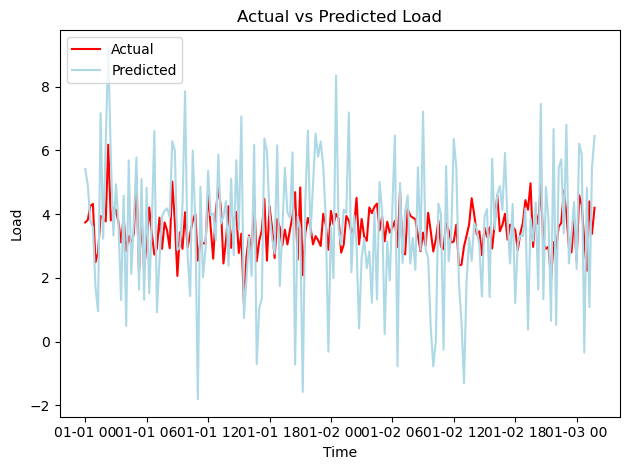

In [7]:
plt.plot(df.Timestamp, df.Power_kW, label='Actual', color='red')
plt.plot(df.Timestamp, df.PredictedLoad_kW, label='Predicted', color='lightblue')
plt.title('Actual vs Predicted Load')
plt.xlabel('Time')
plt.ylabel('Load')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 4.	Area Plot – Cumulative grid supply

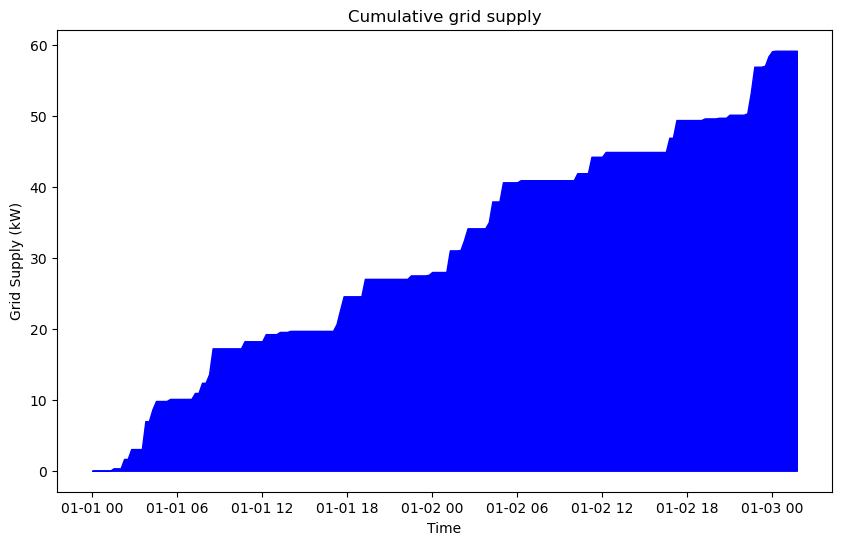

In [8]:
df1 = df.sort_values('Timestamp')
plt.figure(figsize=(10,6))
plt.fill_between(df.Timestamp, df.GridSupply_kW.expanding().sum(), color='blue')
plt.title("Cumulative grid supply")
plt.xlabel('Time')
plt.ylabel('Grid Supply (kW)')
plt.show()

## 5.	Subplot – Power, Voltage, and Current trends

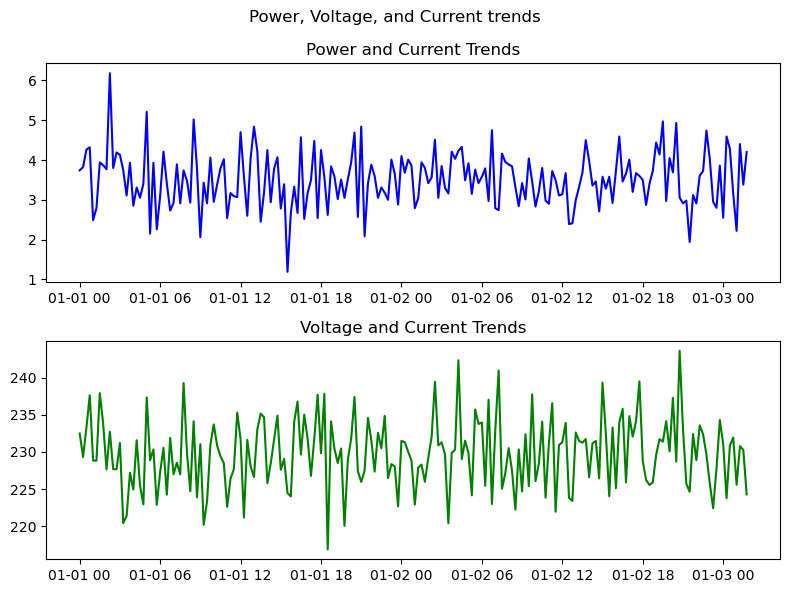

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(8,6))

axs[0].plot(df.Timestamp, df.Power_kW, color='blue')
axs[0].set_title('Power and Current Trends')

axs[1].plot(df.Timestamp, df.Voltage_V, color='green')
axs[1].set_title('Voltage and Current Trends')

fig.suptitle("Power, Voltage, and Current trends")
plt.tight_layout()
plt.show()

# Relationships

## 6.	Scatter Plot – Power vs Current

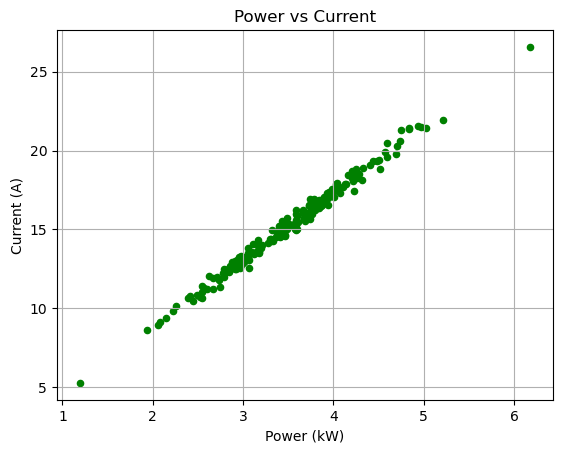

In [10]:
df.plot.scatter('Power_kW', 'Current_A', color='green')
plt.title('Power vs Current')
plt.xlabel('Power (kW)')
plt.ylabel('Current (A)')
plt.grid(True)
plt.show()

## 7.	Scatter Plot – Temperature vs Power

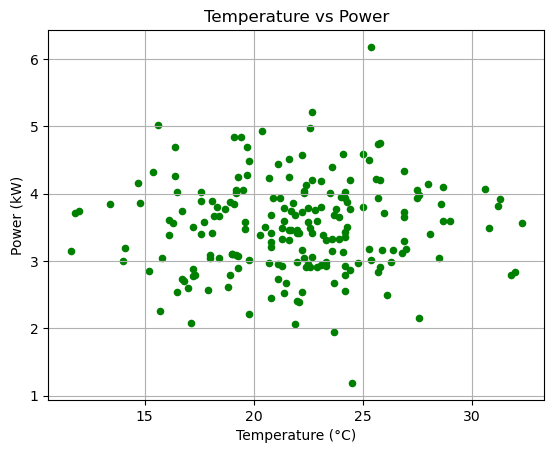

In [11]:
df.plot.scatter('Temperature_C', 'Power_kW', color='green')
plt.title('Temperature vs Power')
plt.xlabel('Temperature (°C)')
plt.ylabel('Power (kW)')
plt.grid(True)
plt.show()

## 8.	Scatter Plot – Humidity vs Power Factor

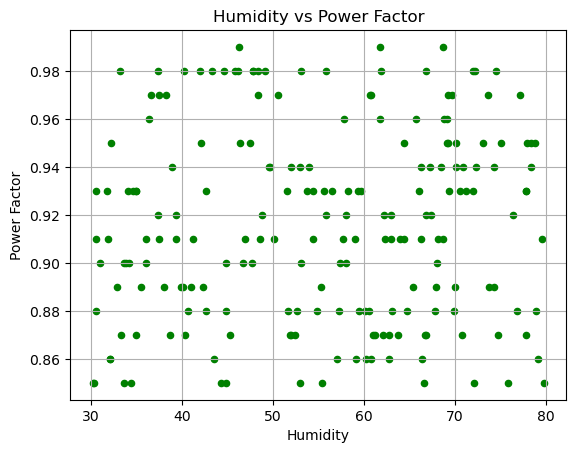

In [12]:
df.plot.scatter('Humidity_%', 'PowerFactor', color='green')
plt.title('Humidity vs Power Factor')
plt.xlabel('Humidity')
plt.ylabel('Power Factor')
plt.grid(True)
plt.show()

## 9.	Scatter Plot – Solar vs Wind contribution

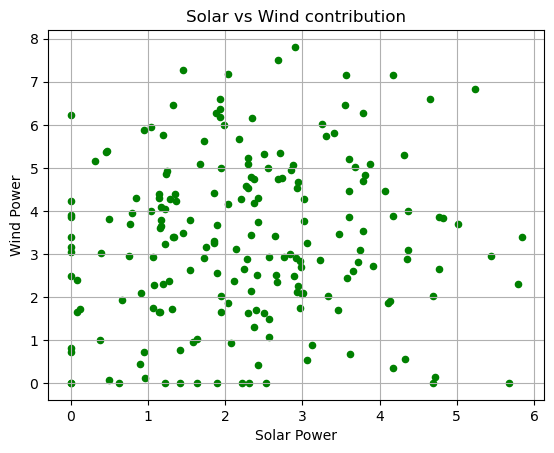

In [13]:
df.plot.scatter('SolarPower_kW', 'WindPower_kW', color='green')
plt.title('Solar vs Wind contribution')
plt.xlabel('Solar Power')
plt.ylabel('Wind Power')
plt.grid(True)
plt.show()

## 10.	Scatter Plot – Grid Supply vs Electricity Price

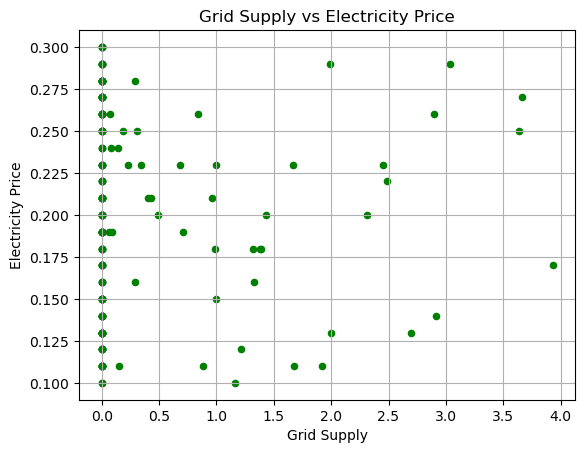

In [14]:
df.plot.scatter('GridSupply_kW', 'ElectricityPrice_USD', color='green')
plt.title('Grid Supply vs Electricity Price')
plt.xlabel('Grid Supply')
plt.ylabel('Electricity Price')
plt.grid(True)
plt.show()

# Distribution & Density

## 11.	Histogram – Power Factor distribution

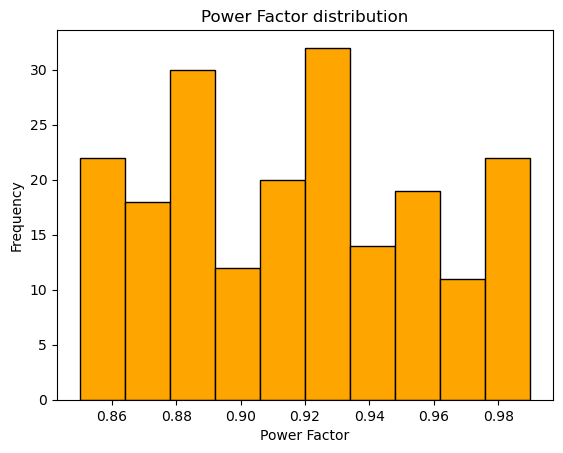

In [15]:
plt.hist(df.PowerFactor, bins=10, color='orange', edgecolor='Black')
plt.title('Power Factor distribution')
plt.xlabel('Power Factor')
plt.ylabel('Frequency')
plt.show()

## 12.	Histogram – Predicted Load variability

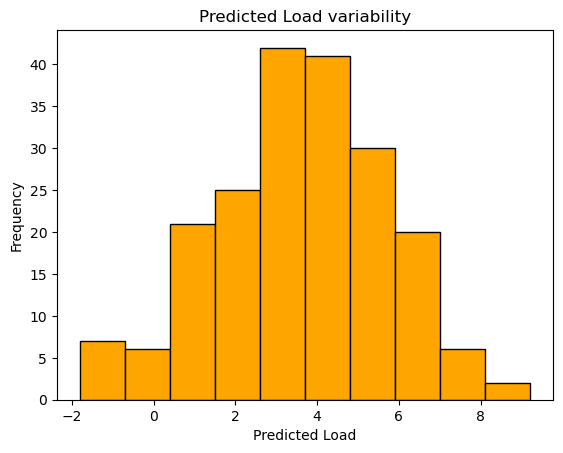

In [16]:
plt.hist(df.PredictedLoad_kW, bins=10, color='orange', edgecolor='Black')
plt.title('Predicted Load variability')
plt.xlabel('Predicted Load')
plt.ylabel('Frequency')
plt.show()

## 13.	Histogram – Electricity Price

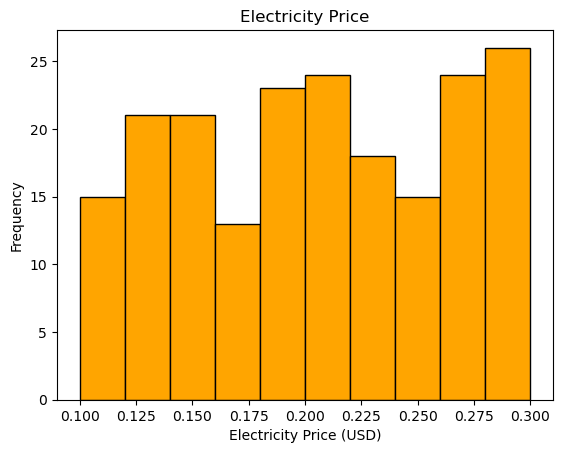

In [17]:
plt.hist(df.ElectricityPrice_USD, bins=10, color='orange', edgecolor='Black')
plt.title('Electricity Price')
plt.xlabel('Electricity Price (USD)')
plt.ylabel('Frequency')
plt.show()

## 14.	Histogram – Temperature

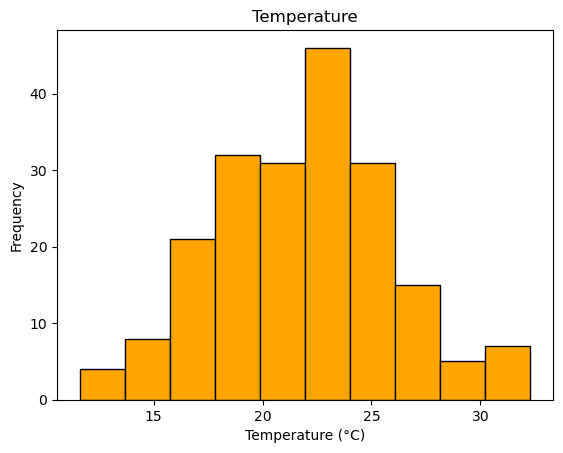

In [18]:
plt.hist(df.Temperature_C, bins=10, color='orange', edgecolor='Black')
plt.title('Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

# Comparison & Aggregation

## 15.	Bar Plot – Average power by hour

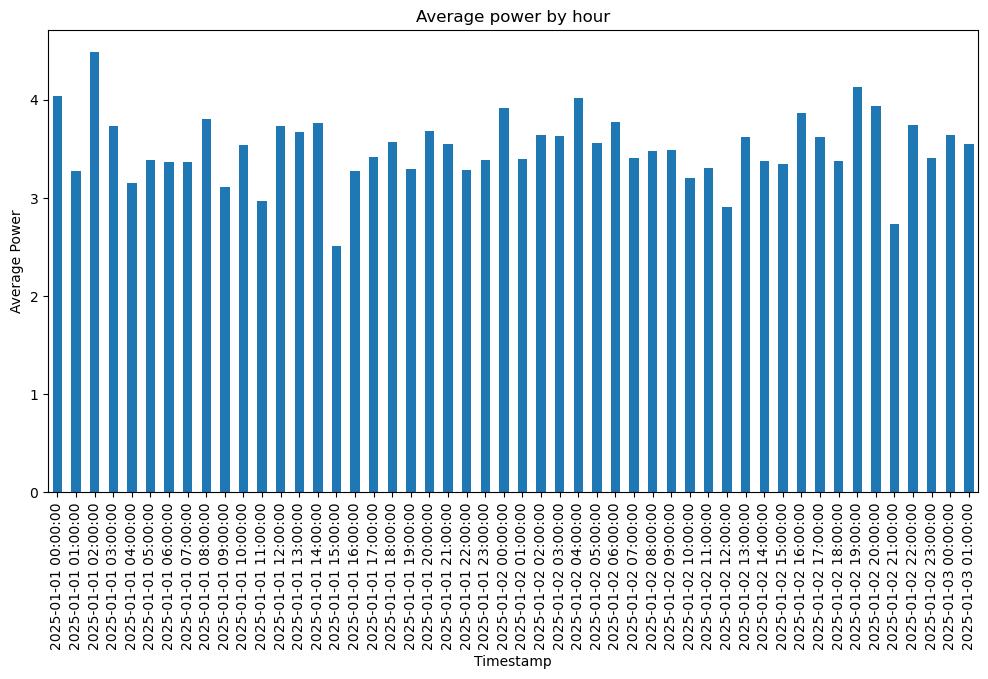

In [19]:
# df['Hour'] = df['Timestamp'].dt.hour
indexed_df = df.set_index('Timestamp')
x = indexed_df['Power_kW'].resample('h').mean()
x.plot.bar(figsize=(12,6))
plt.ylabel('Average Power')
plt.title('Average power by hour')
plt.show()

## 16.	Bar Plot – Electricity price by time of day

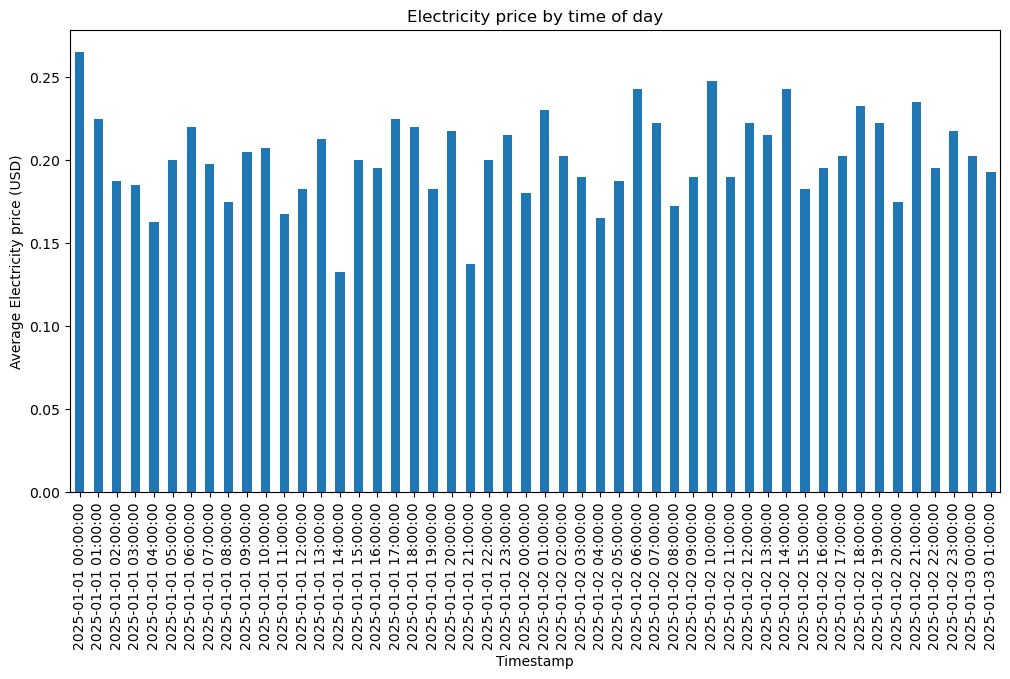

In [20]:
y =indexed_df['ElectricityPrice_USD'].resample('h').mean()
y.plot.bar(figsize=(12,6))
plt.ylabel('Average Electricity price (USD)')
plt.title('Electricity price by time of day')
plt.show()

## 17.	Box Plot – Power by temperature range

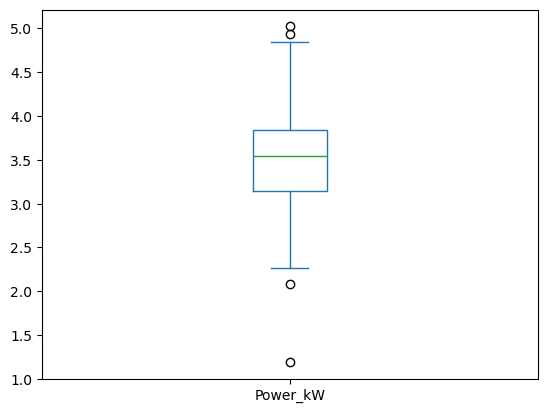

In [21]:
box_plot = df.groupby('Temperature_C')['Power_kW'].mean().plot(kind='box')

## 18.	Box Plot – Grid supply by humidity level

<Axes: title={'center': 'GridSupply_kW'}, xlabel='humidity_level'>

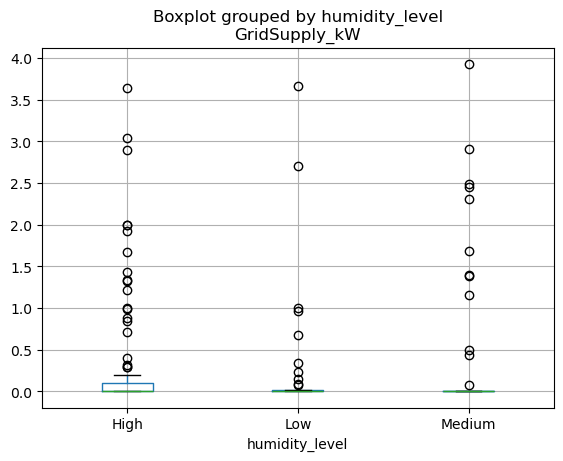

In [22]:
df['humidity_level'] = df['Humidity_%'].apply(lambda x: 'High' if x > 60 else ('Medium' if x > 40 else 'Low'))
df.boxplot(column='GridSupply_kW', by='humidity_level')

## 19.	Pie Chart – Energy source contribution